## <center> Assignment 4: Logistic Regression and Gradient Descent
#### <center>Author: Raffi Sahakyan
##### <center>Class: 19F-MGMTMSA403-1 Optimization
##### <center>Date: 12 Dec, 2019

In [1]:
# Import necessary starting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load train data
data = np.genfromtxt('LRTrain.csv', delimiter=',',skip_header = 1)
n = data.shape[0]
d = data.shape[1]-1

# get feature data
x = data[:,0:d]

# get label data
y = data[:,d]

# initialize weights
w = np.zeros(d)

## Define gradient function
def grad(w, x, y):
    g = np.zeros(d)
    for i in range(n):
        g = g + (1/(1+np.exp(np.dot(-w,x[i,:])))-y[i])*x[i,:]
    return (1/n)*g

## Define negative log likelihood function
def fval(w, x, y):
    v = 0;
    for i in range(n):
        v = v + (y[i]*np.log(1+np.exp(-np.dot(w,x[i,:]))) + (1-y[i])*np.log(1+np.exp(np.dot(w,x[i,:]))))
    return (1/n)*v

In [3]:
# Load test data
data_test = np.genfromtxt('LRTest.csv', delimiter=',',skip_header = 1)
n_test = data_test.shape[0]
d_test = data_test.shape[1]-1

# get feature data
x_test = (data_test[:,0:d_test])

# get label data
y_test = (data_test[:,d_test])

# initialize thresholds 
thresholds = [0 , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1 ]

#### __Question 1__ 
<br>
Train a logistic regression classifier using gradient descent on the training data set LRTrain.csv. The first 30 columns are feature data, and the 31st column is the label of the observation (1 = cancerous, 0 = not cancerous). As a starting point, try using a step size of γ = 0.00001 and a maximum of T = 2000 iterations. You can also use a termination criterion related to the norm of the gradient (np.linalg.norm() may be useful). Experiment with different step sizes and termination criteria to try to obtain a good model fit.

In [4]:
# As per the assignment we are setting an epsilon - 1 and step size - 0.00001

w3 = w2 = w1 = w #np.zeroes(d)

#2000 iterations for the above mentioned values
for iteration in range(0,2000,1):
    w1 = w1 - 0.00001 * (grad(w1, x, y))
    if np.linalg.norm(grad(w1, x, y)) <= 1:
        w1 

In [5]:
#epsilon - 0.05 and step size - 0.0002
#2000 iterations for the above mentioned values
for iteration in range(0,2000,1):
    w2 = w2 - 0.0002 * (grad(w2, x, y))
    if np.linalg.norm(grad(w2, x, y)) <= 0.05:
        w2

In [6]:
#epsilon - 0.025 and step size - 0.0003
#2000 iterations for the above mentioned values
for iteration in range(0,2000,1):
    w3 = w3 - 0.0003 * (grad(w3, x, y))
    if np.linalg.norm(grad(w3, x, y)) <= 0.025:
        w3

In [7]:
#Checking the goodness of fit
print("First: ", round(fval(w1,x,y),3))
print('-'*80)
print("Second: ", round(fval(w2,x,y),3))
print('-'*80)
print("Third: ", round(fval(w3,x,y),3))
print('-'*80)

First:  0.234
--------------------------------------------------------------------------------
Second:  2.09
--------------------------------------------------------------------------------
Third:  1.697
--------------------------------------------------------------------------------


In [8]:
#We will take the w1 for the prediction

#### __Question 2__ 
<br>
Once you have trained your logistic regression classifier, compute the true positive rate (TPR), false positive rate (FPR), true negative rate (TNR), and false negative rate (FNR) on the test dataset LRTest.csv. Re-calculate these performance metrics for each value of the threshold parameter t in t ∈ {0, 0.1, . . . , 0.9, 1}

In [9]:
#Defining predict function
def predict(x, w, t):
    pred_list = []
    
    for i in range(n_test):
        y_pred = 1/(1+np.exp(np.dot(np.transpose(-w), x[i,:])))
        
        if y_pred > t:
            pred_list.append(1)
        
        else:
            pred_list.append(0)
    return pred_list

In [10]:
#Defining function for calculating performance metrics
def performance_metrics(y_true, y_predicted):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_predicted)): 
        if y_true[i]==1  and y_predicted[i]==1:
           TP += 1
        if y_predicted[i]==1 and y_true[i]==0:
           FP += 1
        if y_true[i]==0 and y_predicted[i]==0:
           TN += 1
        if y_predicted[i]==0 and y_true[i]==1:
           FN += 1
        
    TPR, FPR, TNR, FNR = round(TP/(TP+FN),2), round(FP/(TN+FP),2), round(TN/(TN+FP),2), round(FN/(TP+FN),2)
    res = pd.DataFrame([TPR, FPR, TNR, FNR])
    return res.transpose()

In [11]:
#Final dataframe
df_final = pd.DataFrame()

for thres in range(len(thresholds)):
    y_predicted = predict(x_test, w1, thresholds[thres])
    y = performance_metrics(y_test,y_predicted)
    df_final = df_final.append(y)
    
df_final.columns = ["TPR", "FPR","TNR","FNR"]
df_final.index = thresholds
df_final = df_final.rename_axis('Thresholds')

In [12]:
print(df_final)

             TPR   FPR   TNR   FNR
Thresholds                        
0.0         1.00  1.00  0.00  0.00
0.1         0.98  0.58  0.42  0.02
0.2         0.96  0.22  0.78  0.04
0.3         0.91  0.11  0.89  0.09
0.4         0.89  0.06  0.94  0.11
0.5         0.86  0.04  0.96  0.14
0.6         0.85  0.03  0.97  0.15
0.7         0.79  0.01  0.99  0.21
0.8         0.73  0.01  0.99  0.27
0.9         0.71  0.00  1.00  0.29
1.0         0.00  0.00  1.00  1.00


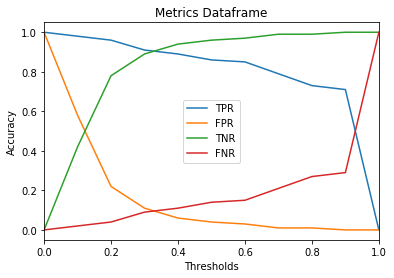

In [13]:
df_final.plot()
plt.ylabel("Accuracy")
plt.title("Metrics Dataframe")
plt.show()

In [14]:
df_final.to_csv("Performance_Metrics_Dataframe_Raffi Sahakyan.csv")